In [5]:
# from mpl_toolkits.mplot3d import Axes3D
from mpld3 import plugins
import mpld3
import sys
import os
sys.path.append(os.path.abspath('..'))
tfmat_path=os.path.abspath('../../CA_tfmat');
print(tfmat_path)                           

from mpld3 import utils
from utils import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
mpld3.enable_notebook()
from IPython.display import HTML
# src='<script src="https://cdn.jsdelivr.net/clipboard.js/1.6.0/clipboard.js"></script>'
# HTML(src)

/media/DATA/Documents/repos/CA_tfmat


In [9]:
# // %%javascript
# // // require.config({
# // //   paths: {
# // //       Clipboard:'//cdn.jsdelivr.net/clipboard.js/1.6.0/clipboard.min.js'
# // // //       d3: '//cdnjs.cloudflare.com/ajax/libs/d3/3.4.8/d3.min'
# // //   }
# // // });
# // // var txt='1'
# // new Clipboard('.btn', {
# //                             text: function(trigger) {
# //                                 return txt;
# //                             }
# //                         });

SyntaxError: invalid syntax (<ipython-input-9-cfb335c83f30>, line 1)

In [99]:

class ClickInfo(plugins.PluginBase):
    """Plugin for getting info on click"""
    
    JAVASCRIPT = """
    mpld3.register_plugin("clickinfo", ClickInfo);
    ClickInfo.prototype = Object.create(mpld3.Plugin.prototype);
    ClickInfo.prototype.constructor = ClickInfo;
    ClickInfo.prototype.requiredProps = ["id","labels"];
    function ClickInfo(fig, props){
        mpld3.Plugin.call(this, fig, props);
    };
    
    ClickInfo.prototype.draw = function(){
        var obj = mpld3.get_element(this.props.id);
        var labels = (this.props.labels);
        obj.elements().on("mousedown",
                          function(d, i){
                          txt=labels[i];
                          window.prompt("Point "+ i + " Copy to clipboard: Ctrl+C, Enter", txt);
                          
                          
                          });
    }
    """
    
#     obj.elements().on("mousedown",
#                           function(d, i){alert("clicked on points[" + labels[i] + "]");});
    def __init__(self, points,labels=None):
        self.dict_ = {"type": "clickinfo",
                      "id": utils.get_id(points),
                     "labels":labels};



In [54]:

# log=readcsv('log.csv',header=['1','2','3','4','5'])
import csv
# data=[[]]*5;
def csv2dat(fname):
    dat=[];
    with open(fname, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter='\t')
        for row in (spamreader):
            dat+=[row];

    return np.array(dat);
    
# dat[0:5,:]

In [277]:
tst_data.shape

(29, 5)

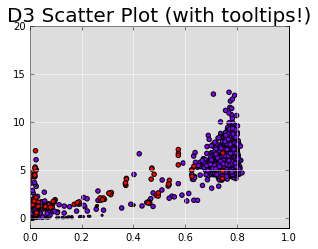

In [379]:
# fig=plt.figure(figsize=[10,5])
# ax=plt.subplot(axisbg='#DDDDDD',)
dat=csv2dat(tfmat_path+'/log10.csv')
# dat=csv2dat(tfmat_path+'/log8_cp.csv')
# dat=csv2dat(tfmat_path+'/tst6.csv')
dN=2000;
# dat=np.vstack((dat,csv2dat(tfmat_path+'/tst1.csv')))
data=dat[n0:n0+dN,:]
col=list(0.2 for i in range(data.shape[0
                                      ]));
tst_data=csv2dat(tfmat_path+'/tstB');
col=col+list(.8 for i in range(tst_data.shape[0]));
data=np.vstack((data,tst_data));

# data=dat;

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#DDDDDD',))
# fig.set_size_inches([10,8])
ax.set_ylim(-1,20)
ax.set_xlim(0,1)
ax.grid(color='white', linestyle='solid')
plt.subplots_adjust(left=0.3, right=0.9, top=0.9, bottom=0.2)

xs=data[:,0];
xs=xs.astype(np.float)
xs[np.isnan(xs)]=0;
ys=(data[:,1].astype(np.float));
# ys[ys==0]=1;
ys=np.log(ys);
ys[~np.isfinite(ys)]=0;

sizs=list(float(x)/5 for x in data[:,2])
N = xs.size;
labels=list(data[:,3]);
# labels=data[:,[0,1,3]].T.to_html


sct = ax.scatter(xs,
                     ys,
                    c=col,
#                      c=list( 1.*float(i)/N for i in xs),
                     s = sizs,
                     alpha=1.0,
#                      label=labels,
                     cmap=plt.cm.rainbow)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)
# labels = ['point {0}'.format(i + 1) for i in range(N)]
# tooltip = plugins.PointLabelTooltip(sct, labels)
plugins.connect(fig, 
                plugins.PointLabelTooltip(sct, labels),
#                 plugins.Zoom(enabled=False),
                ClickInfo(sct,labels)
               )
# plugins.connect(fig,1
#                )


In [304]:
len(list( 1.*float(i)/N for i in xs))
# len(col)-len(xs)
# len(xs)
# n0
# tst_data.shape

0

In [368]:
# dat[146,:];
# dat.shape
# labels
# len(labels) 
# utils.get_id(scatter)
# n
# n0+=50;
n0+=dN;
print(n0)
xs[36]
data[36,:]
len(labels)
# labels[86]
# ys

2000


2011

In [366]:
print(dat.shape)
data[7]

(3881, 5)


array(['0.775805', '497.345698', '100', '2f7cda449cfaab2f66ea4cc6d4', '153'], 
      dtype='<U26')

In [378]:
n0=0;